# Using Machine learning models in scikit-learn

## Setting up the libraries

In [1]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Load the dataset

In [2]:
df = pd.read_csv("D:\My_Codes\Python\IEEE PRoject Prep\Data_2010-2019\DATA_final.csv")

In [3]:
df.head()

,Team1Win,Team1OFFRTG,Team1DEFRTG,Team1NETRTG,Team1AST%,Team1AST/TO,Team1ASTRATIO,Team1OREB%,Team1DREB%,Team1REB%,...,Team2AST/TO,Team2ASTRATIO,Team2OREB%,Team2DREB%,Team2REB%,Team2TOV%,Team2EFG%,Team2TS%,Team2PACE,Team2PIE
0,1,120.8,107.3,13.5,54.4,1.73,17.7,29.0,71.8,51.4,...,1.73,17.2,27.9,71.8,50.5,13.4,51.8,57.3,93.57,56.8
1,1,106.9,106.7,0.2,56.8,1.72,17.0,28.3,71.9,50.2,...,1.79,15.6,28.0,66.9,47.0,11.8,48.2,52.9,94.50,50.5
2,0,107.4,103.6,3.8,57.5,1.85,16.8,29.2,71.3,49.7,...,1.51,17.8,34.0,63.6,49.4,16.6,49.4,54.8,88.66,51.8
3,0,111.3,104.9,6.4,47.1,1.31,14.8,32.6,73.2,52.8,...,1.79,17.2,26.3,65.7,45.7,13.1,52.9,57.0,95.58,50.9
4,1,104.9,100.8,4.1,57.6,1.71,17.3,29.4,74.3,53.0,...,1.42,17.8,33.7,72.5,53.3,17.5,52.0,55.9,92.63,50.2


In [4]:
df.tail()

,Team1Win,Team1OFFRTG,Team1DEFRTG,Team1NETRTG,Team1AST%,Team1AST/TO,Team1ASTRATIO,Team1OREB%,Team1DREB%,Team1REB%,...,Team2AST/TO,Team2ASTRATIO,Team2OREB%,Team2DREB%,Team2REB%,Team2TOV%,Team2EFG%,Team2TS%,Team2PACE,Team2PIE
12068,0,111.0,106.4,4.6,59.5,1.47,17.0,28.0,76.4,52.6,...,1.64,16.1,31.3,66.2,48.7,13.4,50.7,55.7,103.94,49.9
12069,1,112.1,105.5,6.6,53.7,1.67,17.6,28.0,68.6,49.2,...,1.39,14.3,30.6,74.7,51.0,13.9,49.1,52.7,100.56,45.0
12070,0,114.3,113.3,1.0,59.6,1.88,18.2,29.6,73.4,51.3,...,2.00,20.9,26.6,71.8,51.1,14.8,59.9,63.1,104.00,58.5
12071,0,106.6,111.6,-5.0,58.7,1.45,16.7,28.7,78.2,51.3,...,1.79,17.8,27.7,70.3,48.9,13.7,55.0,57.4,106.24,50.2
12072,1,111.9,110.6,1.2,56.9,2.02,17.3,27.9,74.2,50.8,...,1.38,18.3,21.7,75.9,48.1,17.9,51.7,55.7,102.14,40.6


In [5]:
df.shape

(12073, 29)

In [6]:
df.describe()

,Team1Win,Team1OFFRTG,Team1DEFRTG,Team1NETRTG,Team1AST%,Team1AST/TO,Team1ASTRATIO,Team1OREB%,Team1DREB%,Team1REB%,...,Team2AST/TO,Team2ASTRATIO,Team2OREB%,Team2DREB%,Team2REB%,Team2TOV%,Team2EFG%,Team2TS%,Team2PACE,Team2PIE
count,12073.000000,12073.000000,12073.000000,12073.000000,12073.000000,12073.000000,12073.000000,12073.000000,12073.00000,12073.000000,...,12073.000000,12073.000000,12073.000000,12073.000000,12073.000000,12073.000000,12073.000000,12073.000000,12073.000000,12073.000000
mean,0.420939,106.278133,106.413543,-0.135658,58.165733,1.572179,16.868475,28.805359,71.09011,49.956208,...,1.578673,16.913965,28.885654,71.150617,50.039079,14.896786,50.476849,54.367142,95.372712,50.099255
std,0.493730,4.899143,4.562341,6.156639,4.823570,0.254402,1.509846,3.438921,2.88381,1.961932,...,0.255646,1.527172,3.437138,2.864899,1.954445,1.594884,2.832605,2.655893,3.694334,4.154734
min,0.000000,78.500000,73.300000,-34.300000,27.300000,0.630000,7.400000,12.300000,54.50000,38.900000,...,0.630000,10.500000,12.800000,55.000000,40.500000,8.200000,35.300000,43.800000,85.100000,32.600000
25%,0.000000,103.000000,103.400000,-4.200000,55.000000,1.400000,15.900000,26.500000,69.20000,48.700000,...,1.400000,15.900000,26.600000,69.200000,48.800000,13.800000,48.600000,52.600000,92.660000,47.300000
50%,0.000000,106.200000,106.500000,0.000000,58.100000,1.560000,16.800000,28.700000,71.10000,49.900000,...,1.560000,16.900000,28.800000,71.100000,50.000000,14.900000,50.400000,54.300000,95.240000,50.100000
75%,1.000000,109.600000,109.500000,3.900000,61.300000,1.730000,17.800000,31.200000,72.90000,51.200000,...,1.740000,17.900000,31.200000,73.000000,51.300000,15.900000,52.300000,56.200000,97.730000,52.800000
max,1.000000,126.000000,129.700000,25.400000,81.300000,3.000000,22.200000,47.700000,87.20000,58.200000,...,3.130000,22.200000,45.500000,90.200000,60.000000,23.900000,64.300000,67.400000,109.700000,70.900000


In [7]:
df.groupby('Team1Win').size()

Team1Win
0    6991
1    5082
dtype: int64

## Data Visualisation

## HeatMaps

<AxesSubplot:title={'center':'Feature Co-relation plot'}>

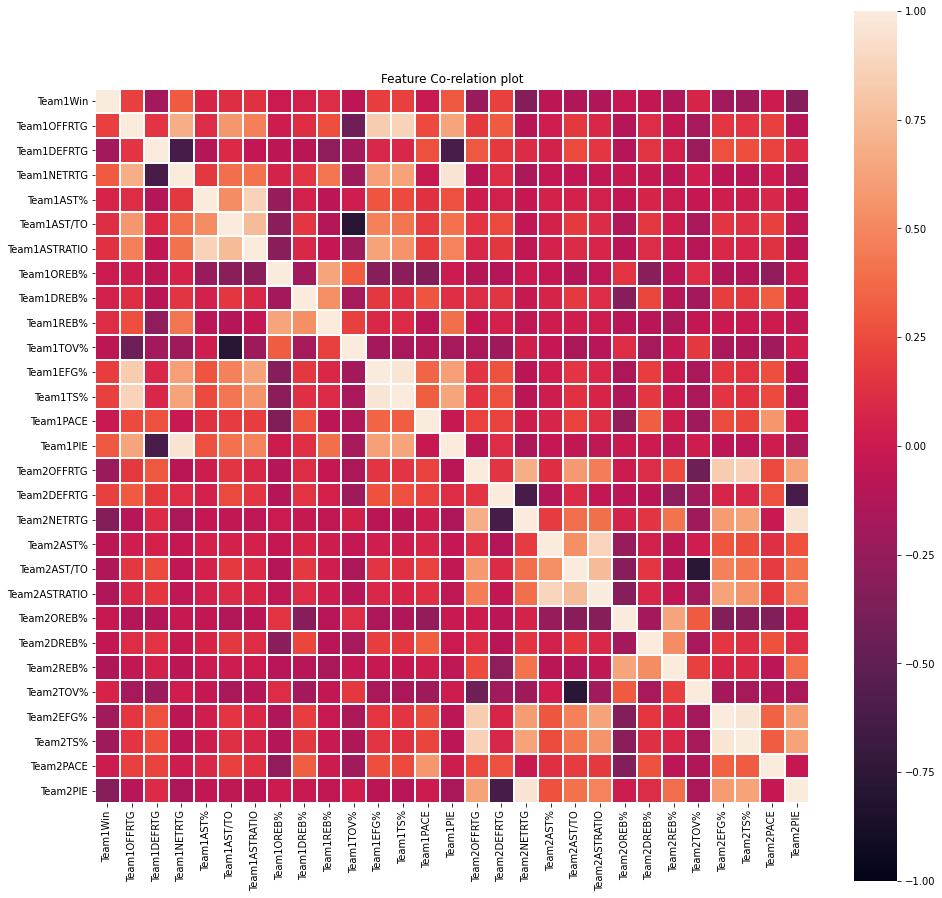

In [8]:
plt.figure(figsize = (16,16))
plt.title('Feature Co-relation plot')
sns.heatmap(data = df.corr(), vmin=-1, vmax=1, square = True, linewidths=1, linecolor='white')

## Bar graphs


<AxesSubplot:title={'center':'Away Team Wins and Losses'}, xlabel='Team1Win', ylabel='count'>

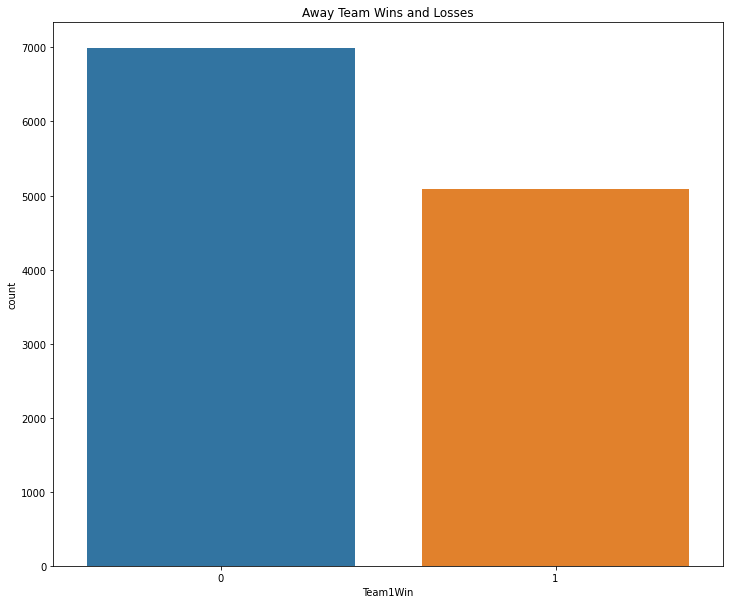

In [9]:
plt.figure(figsize = (12,10))
plt.title('Away Team Wins and Losses')
sns.countplot(x = 'Team1Win', data = df)

## Scatter Plots

<AxesSubplot:title={'center':'Effect of NETRTG of team2'}, xlabel='Team1Win', ylabel='Team2NETRTG'>

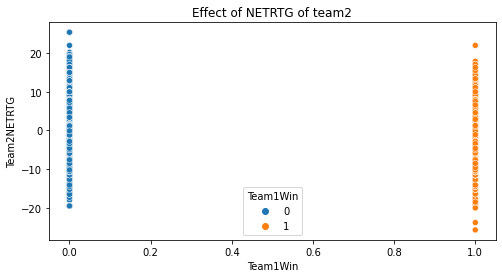

In [10]:
plt.figure(figsize = (8,4))
plt.title('Effect of NETRTG of team2')
sns.scatterplot(x = df['Team1Win'], y = df['Team2NETRTG'], hue = df['Team1Win'])

## Trying out models in scikit-learn

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import preprocessing

In [12]:
#Features and response

X = df.drop('Team1Win', axis = 1)
y = df['Team1Win']

In [13]:
#Train and Test splitting of data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [14]:
#Apply standard scaling

# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [15]:
# Apply minmax scaling

# minmax = MinMaxScaler()
# X_train = minmax.fit_transform(X_train)
# X_test = minmax.transform(X_test)

In [16]:
#checking the text values
X_test

,Team1OFFRTG,Team1DEFRTG,Team1NETRTG,Team1AST%,Team1AST/TO,Team1ASTRATIO,Team1OREB%,Team1DREB%,Team1REB%,Team1TOV%,...,Team2AST/TO,Team2ASTRATIO,Team2OREB%,Team2DREB%,Team2REB%,Team2TOV%,Team2EFG%,Team2TS%,Team2PACE,Team2PIE
2807,99.8,99.0,0.8,55.5,1.29,15.5,30.7,74.4,53.2,16.3,...,1.54,17.5,30.3,72.2,50.7,15.8,48.4,51.9,90.85,49.3
4819,105.9,111.0,-5.2,59.9,1.37,17.5,26.5,72.4,49.3,17.2,...,1.60,16.7,30.8,69.5,49.9,14.3,53.0,57.8,93.00,52.3
5519,109.1,115.3,-6.2,59.8,1.74,17.3,33.5,67.5,49.9,14.1,...,1.83,18.0,28.7,68.9,48.2,13.6,50.2,55.5,99.57,51.2
10171,107.0,112.9,-6.0,60.0,1.56,17.2,23.5,70.3,47.1,14.7,...,1.79,16.6,28.1,72.2,50.3,12.6,51.7,55.6,99.39,52.7
7654,111.9,106.5,5.4,64.6,1.94,19.4,23.1,72.2,48.1,13.8,...,1.79,18.0,28.0,76.0,50.6,13.9,49.5,53.4,99.89,48.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4768,109.1,107.5,1.6,43.9,1.22,13.8,27.3,70.4,48.9,14.7,...,1.85,17.8,31.6,66.8,49.8,13.5,53.9,56.4,90.21,52.2
8965,108.0,113.5,-5.4,62.6,1.60,18.1,29.5,68.8,48.9,15.6,...,2.18,18.9,25.8,73.2,50.2,11.9,54.4,58.3,96.66,56.1
3429,99.6,105.5,-6.0,50.1,1.19,14.4,26.1,66.8,46.4,15.9,...,0.99,13.0,37.5,71.6,54.3,17.9,43.8,50.6,87.97,52.2
973,102.1,107.5,-5.3,60.1,1.21,15.8,24.9,71.1,48.7,17.2,...,1.62,17.3,28.0,73.8,50.6,14.5,49.5,54.4,90.75,53.2


In [17]:
#Putting results in a list for comparision
results = list()
names = list()

## Random Forest Classifier

In [18]:
rfc = RandomForestClassifier(max_depth=8, random_state=0,n_estimators = 300)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
print(accuracy_score(y_test, pred_rfc))
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))
names.append('rfc')
results.append(accuracy_score(y_test, pred_rfc))

0.6894409937888198
              precision    recall  f1-score   support

           0       0.70      0.79      0.74      1374
           1       0.67      0.56      0.61      1041

    accuracy                           0.69      2415
   macro avg       0.68      0.67      0.68      2415
weighted avg       0.69      0.69      0.68      2415

[[1082  292]
 [ 458  583]]


## SVC

In [19]:
clf = SVC(gamma='scale',probability=True)
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)
print(accuracy_score(y_test, pred_clf))
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))
accuracy_score(y_test, pred_clf)
names.append('SVC')
results.append(accuracy_score(y_test, pred_clf))

0.6997929606625258
              precision    recall  f1-score   support

           0       0.71      0.81      0.75      1374
           1       0.69      0.55      0.61      1041

    accuracy                           0.70      2415
   macro avg       0.70      0.68      0.68      2415
weighted avg       0.70      0.70      0.69      2415

[[1114  260]
 [ 465  576]]


## Neural Network

In [20]:
mlpc = MLPClassifier(hidden_layer_sizes = (11,11,11), max_iter = 1200)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)
print(accuracy_score(y_test, pred_mlpc))
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))
names.append('mlpc')
results.append(accuracy_score(y_test, pred_mlpc))

0.6902691511387163
              precision    recall  f1-score   support

           0       0.72      0.75      0.73      1374
           1       0.65      0.61      0.63      1041

    accuracy                           0.69      2415
   macro avg       0.68      0.68      0.68      2415
weighted avg       0.69      0.69      0.69      2415

[[1030  344]
 [ 404  637]]


## BaggingSVC 

In [21]:
advclf = BaggingClassifier(base_estimator=SVC(gamma='scale'), n_estimators=10, random_state=0)
advclf.fit(X_train, y_train)
pred_advclf = advclf.predict(X_test)
print(accuracy_score(y_test, pred_advclf))
print(classification_report(y_test, pred_advclf))
print(confusion_matrix(y_test, pred_advclf))
names.append('BaggingSVC')
results.append(accuracy_score(y_test, pred_advclf))

0.6997929606625258
              precision    recall  f1-score   support

           0       0.70      0.82      0.76      1374
           1       0.69      0.55      0.61      1041

    accuracy                           0.70      2415
   macro avg       0.70      0.68      0.68      2415
weighted avg       0.70      0.70      0.69      2415

[[1120  254]
 [ 471  570]]


## Linear SVC

In [22]:
lclf = LinearSVC(random_state=0, tol=1e-5, max_iter=5000, dual=False)
lclf.fit(X_train, y_train)
pred_lclf = lclf.predict(X_test)
print(accuracy_score(y_test, pred_lclf))
print(classification_report(y_test, pred_lclf))
print(confusion_matrix(y_test, pred_lclf))
names.append('linear_svc')
results.append(accuracy_score(y_test, pred_lclf))

0.6985507246376812
              precision    recall  f1-score   support

           0       0.71      0.80      0.75      1374
           1       0.68      0.57      0.62      1041

    accuracy                           0.70      2415
   macro avg       0.69      0.68      0.68      2415
weighted avg       0.70      0.70      0.69      2415

[[1094  280]
 [ 448  593]]


# KNN

In [23]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)
print(accuracy_score(y_test, pred_knn))
print(classification_report(y_test, pred_knn))
print(confusion_matrix(y_test, pred_knn))
names.append('KNN')
results.append(accuracy_score(y_test, pred_knn))

0.6774327122153209
              precision    recall  f1-score   support

           0       0.69      0.79      0.74      1374
           1       0.66      0.53      0.59      1041

    accuracy                           0.68      2415
   macro avg       0.67      0.66      0.66      2415
weighted avg       0.67      0.68      0.67      2415

[[1083  291]
 [ 488  553]]


['rfc', 'SVC', 'mlpc', 'BaggingSVC', 'linear_svc', 'KNN']


[0.6894409937888198,
 0.6997929606625258,
 0.6902691511387163,
 0.6997929606625258,
 0.6985507246376812,
 0.6774327122153209]

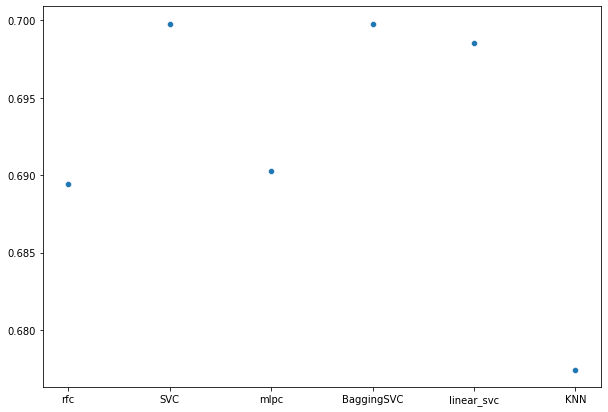

In [24]:
#plotting

plt.figure(figsize = (10,7))
sns.scatterplot(x = names, y = results)

print((names))
(results)

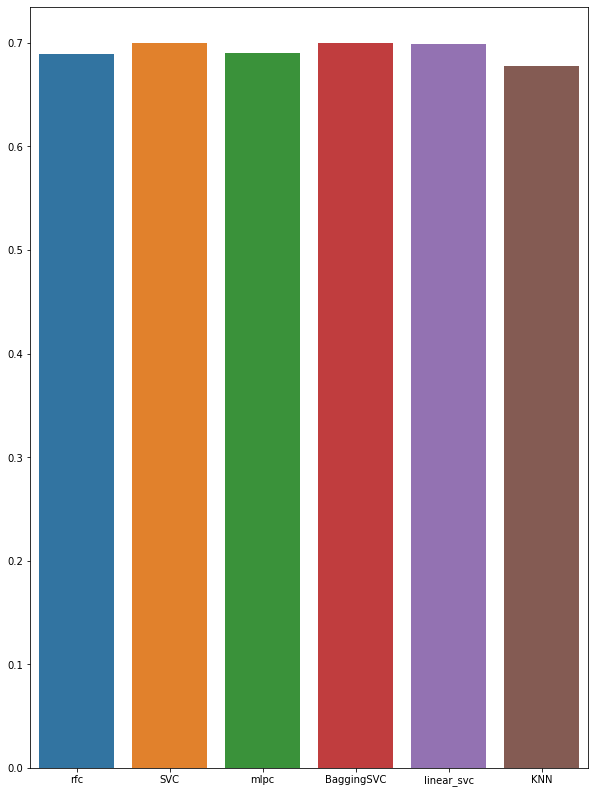

In [25]:
plt.figure(figsize = (10,14))
app = sns.barplot(x = names, y = results)